# RL Circuit Notebook

## Introduction

This is a Jupyter notebook illustrating a series circuit containing a resistor, an inductor, and a voltage source. The next level up in circuit complexity is to add a capacitor. This notebook doesn't do that. The circuit under consideration is sufficiently popular it has a name, &ldquo;the RL circuit.&rdquo; It could just as well be called the LR circuit. The R in RL stands for the resistance of the resistor, and the L stands for the inductance of the inductor (because the letter I is already used for current in this type of circuit and people decided to honor Emil Lenz (the Russian physicst who gave us Lenz's Law) by using L for inductance.

![RL Circuit](https://upload.wikimedia.org/wikipedia/commons/8/8b/Series-RL.png)
<center>Image Credit/License: <a href="https://commons.wikimedia.org/w/index.php?curid=545110">CC BY-SA 3.0</a></center>

In the drawing above, you need to imagine two things. A voltage source (either a battery or a function generator) would be connected to the two terminals labeled V<sub>in</sub>. This addition to the circuit is needed to complete it. Without it, the circuit can't do anything at all.

A multimeter (or better yet, an oscilloscope) would be connected to the two terminals labeled V<sub>L</sub>. Don't think of this as another addition to the circuit. The multimeter or oscilliscope gives us something to measure, namely the voltage across the inductor.

## Goals

There are actually three very different goals in working with this notebook:

1. Get experience with properties of RL circuits.
2. Get an idea of how a computer solves a differential equation using &ldquo;finite difference methods.&rdquo;
3. Learn how to write and execute Python code in a Jupyter notebook.

Since we're attempting three things simultaneously, it's fine if we only make a small amount of progress on each of them. Once you've gotten a start, you can build endlessly on these ideas.

## Circuit Equation

One of Kirchoff's Laws says that the sum of voltages around a circuit is 0. There's a tiny bit of a cheat in that now that we have introduced inductance, but the result is completely correct. Going clockwise around the circuit above, we must have:

0 = V<sub>in</sub> - V<sub>R</sub> - V<sub>L</sub>

The signs are there just because that's the way the arrows are drawn. You are supposed to imagine the red or + connector on the battery or multimeter as being at the head of the arrow. If we were to reverse the connectors on the battery or the multimeter, then we would also draw the arrows the other way.


### V<sub>R</sub>

Look closely at the diagram. The person that drew it has the current going clockwise through the circuit. The voltage across the resistor is going to oppose the current flow. You can see that the person that drew the diagram has been helpful to us by drawing the V<sub>R</sub> arrow to oppose the flow. So we don't have to add any more minus signs in this equation:

V<sub>R</sub> = R &middot; I

### V<sub>L</sub>

Similarly, the voltage across the inductor is going to oppose increasing current, so we don't have to add any more
minus signs in this equation:

V<sub>L</sub> = L &middot; dI/dt

### Differential Equation

Substituting in we have

0 = V<sub>in</sub> - R &middot; I - L &middot; dI/dt

Usually you solve this for dI/dt, so it is:

dI/dt = V<sub>in</sub>/L - I &middot; R/L

The units of all three terms are Coulombs per second squared. Which are somewhat analogous to meters per second squared, the units for acceleration.

In fact, if you put in I = dQ/dt and you also add a capacitor in series, you'd have the equation for an RLC circuit.

d<sup>2</sup>Q/dt<sup>2</sup> = V<sub>in</sub>/L - dQ/dt&middot;R/L - Q/(LC)

This looks suspiciously similar to:

d<sup>2</sup>x/dt<sup>2</sup> = F/m - c &middot; dx/dt/m - k &middot; x/m

and indeed the LRC circuit and the damped harmonic oscillator have the same kind of solutions. We're not going to add a capacitor. This is weird. It is like leaving the spring out of the damped harmonic oscillator, in which case
you'd have this equation:

dv/dt = F/m - c &middot; v/m

Notice that without the spring, you can write the equation in terms of the velocity. Mathematically, this is entirely analogous to what we are solving.

## Finite Difference Methods

We have this equation:

dI/dt = V<sub>in</sub>/L - I &middot; R/L

We are going to approximate dI/dt by (I(t+&Delta;t)-I(t))/&Delta;t. Put that in and solve for I(t+&Delta;t):

I(t+&Delta;t) = I(t) + &Delta;t &middot; (V<sub>in</sub>/L - I(t) &middot; R/L)

That's all there is to it! This is called a finite-difference equation. It can get a load messier if we have second derivatives, but because we haven't put in a capacitor, we don't have to get into that.

Let us hope that we can get a good approximation to the equation if &Delta;t is 1/1000 of a second. There is no good reason for choosing this particular value. It might be unnecessarily small. It might not be small enough.

## Parameters and Initial Conditions

A system has a some laws governing it (usually a differential equation), and it has some initial conditions.

Let's start with no current flowing, and let's put in a battery with a fixed voltage of 12V.

Let's use [this](https://www.mouser.com/Passive-Components/Inductors-Chokes-Coils/Images/_/N-5gb4?P=1yztpv4) 300 mH inductor and a 50 &Omega; resistor.

As long as we use MKS units everywhere we don't have to carry units or units conversions around.

Here's how we capture this in Python:

In [1]:
# By default, Python doesn't have graphing/plotting. The following statement adds graphing/plotting capability.
import matplotlib.pyplot as plt 
# The following is also incredibly convenient when working with lists of times and currents.
import numpy as np

Vin = 12  # battery voltage

I0 = 0    # initial current, none

L = 2.000 # inductance value -- 300 mH

R = 50            # resistance value -- 50 Ohms

delta_t = 0.001   # time increment in seconds -- 1/1000 of a second

## Executing Python Code

Put your cursor in the code block above by clicking on it. Then hold down the shift key and hit the Enter key. On many computers, the Enter key is labeled Return. There is no significant difference between Enter and Return. Call it what you like.

If this goes properly, the In\[\] to the left of the code block will change to In\[1\]. Do it again. It will change to In\[2\].

**If you can't get this to work there is no point in proceeding. Ask your lab professor or lab assistant or anyone else who might have ideas on what is wrong for help.**

### Getting I1

We have I(0) as the initial condition and we have called that I0. Let's give I(0+&Delta;t) the name I1, and I(0+2&Delta;t) the name I2, etc.

The finite difference equation for I1 says:

In [2]:
I1 = I0 + delta_t * (Vin/L - I0 * R/L)

### Getting I2

The finite difference equation for I2 says:

In [3]:
I2 = I1 + delta_t * (Vin/L - I1 * R/L)

### Getting I3

Ok, you've seen how this works, finish writing the code in the cell below to get I3:

In [4]:
I3 = I2 + delta_t * (Vin/L - I2 * R/L)

In [5]:
I3

0.01755375

If the cell above did not get 0.10111111111111111 for I3, go back and re-check your work. Once you have found
the mistake, re-execute all the cells up until this point.

### Getting I4 to I20

Keep going (yes, this is getting tedious, soon you'll learn new tricks to avoid tedium):

In [6]:
I4 = I3 + delta_t * (Vin/L - I3 * R/L)
I5 = I4 + delta_t * (Vin/L - I4 * R/L)
I6 = I5 + delta_t * (Vin/L - I5 * R/L)
I7 = I6 + delta_t * (Vin/L - I6 * R/L)
I8 = I7 + delta_t * (Vin/L - I7 * R/L)
I9 = I8 + delta_t * (Vin/L - I8 * R/L)
I10 = I9 + delta_t * (Vin/L - I9 * R/L)
I11 = I10 + delta_t * (Vin/L - I10 * R/L)
I12 = I11 + delta_t * (Vin/L - I11 * R/L)
I13 = I12 + delta_t * (Vin/L - I12 * R/L)
I14 = I13 + delta_t * (Vin/L - I13 * R/L)
I15 = I14 + delta_t * (Vin/L - I14 * R/L)
I16 = I15 + delta_t * (Vin/L - I15 * R/L)
I17 = I16 + delta_t * (Vin/L - I16 * R/L)
I18 = I17 + delta_t * (Vin/L - I17 * R/L)
I19 = I18 + delta_t * (Vin/L - I18 * R/L)
I20 = I19 + delta_t * (Vin/L - I19 * R/L)

In [7]:
I20

0.09535495674741588

If the cell above did not get 0.23373982720689868 for I20, go back and re-check your work. Once you have found
the mistake, re-execute all the cells up until this point.

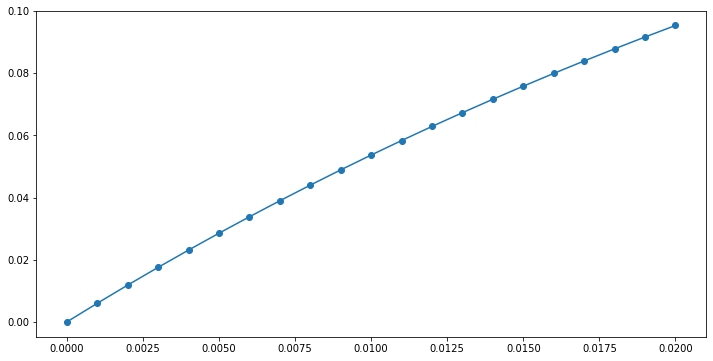

'The current rises quickly from zero and then seems to be leveling off.'

In [8]:
# Plot what we have got

times = delta_t * np.arange(0, 21, 1)
currents = [I0, I1, I2, I3, I4, I5, I6, I7, I8, I9, I10, I11, I12, I13, I14, I15, I16, I17, I18, I19, I20]

plt.figure(figsize=(12, 6))

plt.plot(times, currents, '-o')

plt.show()

"The current rises quickly from zero and then seems to be leveling off."

## Introducing Arrays and While Loops

Filling in the formulas for I3 to I10, right? Imagine if we had wanted to continue all the way to I50
how tedious it would have been. Now you're going to learn two concepts that eliminate the tedium.

Instead of defining 21 different current variables (I0 to I20 is 21 variables), we are going to introduce
something called an array that can hold as many current variables as is needed.

Let's do 50 steps (starting from step 0 and ending at step 50). That's actually 51 different values.

While we are at it, let's also get a second array that can hold as many times as is needed.

This is how you do that:

In [9]:
steps = 1000

currents = np.zeros(steps + 1)
times = delta_t * np.arange(0, steps + 1)

In [10]:
currents

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
times

array([0.   , 0.001, 0.002, ..., 0.998, 0.999, 1.   ])

In [12]:
currents[0]

0.0

In [13]:
times[0]

0.0

### While Loops

Now we are going to introduce while loops. Here is how you execute something 50 times:

In [14]:
i = 1

while i <= steps:
    currents[i] = currents[i - 1] + delta_t * (Vin/L - currents[i - 1] * R/L)
    i = i + 1

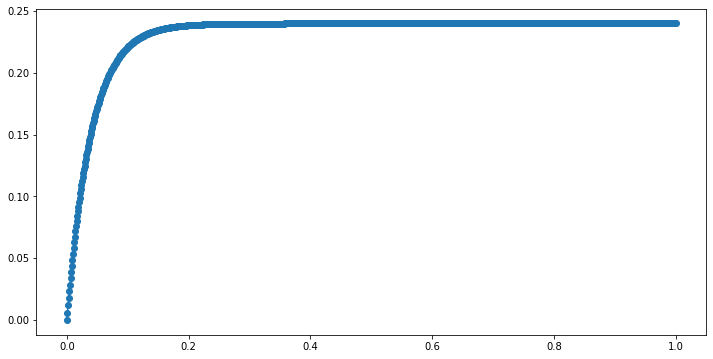

In [15]:
plt.figure(figsize=(12, 6))

plt.plot(times, currents, '-o')

plt.show()

## Swapping the Battery for a Function Generator

Instead of having 



In [16]:
from math import cos, pi

f = 5   # Set function generator to 5 Hz
V0 = 10 # Set maximum voltage to 10V

# Nicer to work with angular frequency
omega = 2 * pi * f

i = 1

while i <= steps:
    time = times[i - 1]
    old_current = currents[i - 1]
    voltage = V0 * cos(omega * time)
    new_current = old_current + delta_t * (voltage/L - old_current * R/L)
    currents[i] = new_current
    i = i + 1



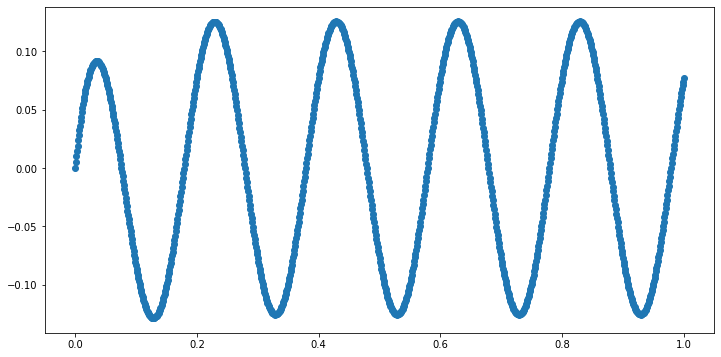

In [17]:
plt.figure(figsize=(12, 6))

plt.plot(times, currents, '-o')

plt.show()